In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [368]:
settings = {}
settings['N'] = 500
settings['Nday'] = 240
settings['N_meet_day'] = 2.3
settings['p_contagion'] = 0.1
settings['durations_day'] = 13

In [373]:
def simulate(p_contagion = settings['p_contagion'], N_meet_day=settings['N_meet_day']):
    humans = np.zeros(settings['N'])
    contagion_era = np.zeros(settings['N'])
    humans[0] = 1
    sick = []
    immunized = []
    total_sick = 1

    for _ in range(0,settings['Nday']):
        meeting_number = np.random.poisson(N_meet_day, settings['N'])
        contagion_era = contagion_era + np.where(humans>0,humans,0)
        new_humans = np.copy(humans)
        for i, p, nm in np.nditer([np.arange(settings['N']), humans, meeting_number]):
            met_people = np.random.choice(humans,nm,replace = False)

            x = p_contagion*np.sum(np.where(met_people>0,met_people,0))
            if (p >= 0) and (p < 1) and (np.random.random() < x):
                new_humans[i] = 1
                total_sick = total_sick + 1
            else:
                new_humans[i] = p
        for i,e in np.nditer([np.arange(settings['N']),contagion_era]):
            if e > settings['durations_day']:
                new_humans[i] = -1
        humans = np.copy(new_humans)
        sick.append(np.sum(np.where(humans==1,1,0)))
        immunized.append(np.sum(np.where(humans==-1,1,0)))

    return sick, immunized, total_sick

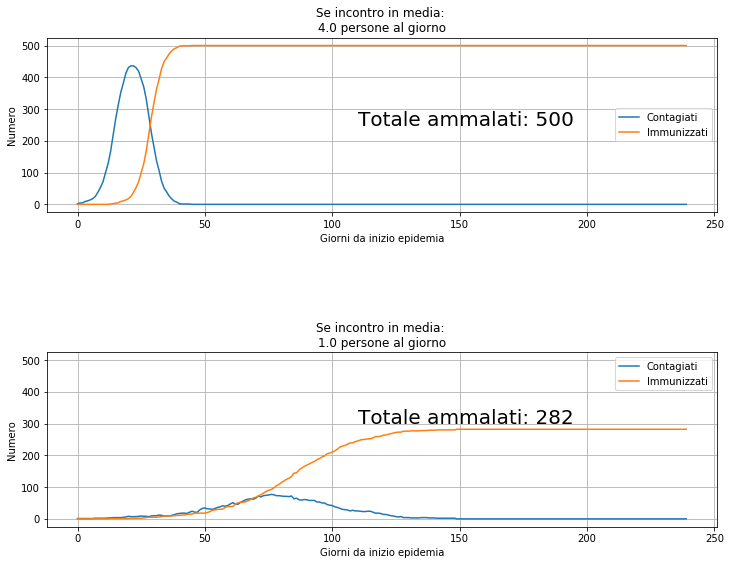

In [395]:
fig, axs = plt.subplots(2, 1, figsize=(12, 9), sharey=True)
plt.subplots_adjust(hspace = 0.8)
nmd = 4.0
sick, immunized, total_sick = simulate(p_contagion=0.1, N_meet_day= nmd)
axs[0].plot(range(0,settings['Nday']), sick, label = 'Contagiati')
axs[0].plot(range(0,settings['Nday']), immunized, label = 'Immunizzati')
axs[0].set(xlabel="Giorni da inizio epidemia", ylabel='Numero', title='Se incontro in media: \n'+str(nmd)+ ' persone al giorno')
axs[0].annotate('Totale ammalati: '+str(total_sick),xy=(110, 250), fontsize=20)
axs[0].grid()
axs[0].legend()

nmd = 1.0
sick, immunized, total_sick = simulate(p_contagion=0.1, N_meet_day= nmd)
axs[1].plot(range(0,settings['Nday']), sick, label = 'Contagiati')
axs[1].plot(range(0,settings['Nday']), immunized, label = 'Immunizzati')
axs[1].set(xlabel="Giorni da inizio epidemia", ylabel='Numero', title='Se incontro in media: \n'+str(nmd)+ ' persone al giorno')
axs[1].annotate('Totale ammalati: '+str(total_sick),xy=(110, 300), fontsize=20)
axs[1].grid()
axs[1].legend()
plt.show()